> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB 5000 Movie Dataset - DAND Project)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.


>Selected dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata


> In this project of my data analysis, I investigate the TMDb Movie Database file that contains a collection of important data for about 5,000 movies, including budget details, Genres, release dates,votes_average, etc.

>budget - The budget in which the movie was made.(int)

>genres - The genre of the movie, Action, Comedy, Thriller, etc.(object)

>homepage - A link to the homepage of the movie on TMDB.(object)

>id - This is movie id.(int)

>imbd_id - Internal TMDB identification number. (object)

>keywords - Keywords for search engines.(object)

>original_language - The language in which the movie was made.(object)

>original_title - The title of the movie before translation or adaptation.(object)

>overview - A Short description of the movie.(object)

>cast - List of actors.(object)

>director - The name of Director, Editor, Composer, Writer etc.(object)

>release_year - The year on which it was released.(int)

>popularity - A numeric quantity specifying the movie's popularity.(float)

>production_companies - Companies participating in movie production.(object)

>production_countries - The country in which it was produced.(object)

>release_date - The date on which it was released in mm/dd/yy format.(object)

>revenue - The worldwide revenue generated by the movie.(int)

>budget_adj - budget in 2010 dollars,accounting for inflation.(float)

>revenue_adj - revenue in 2010 dollars,accounting for inflation.(float)

>runtime - The running time of the movie in minutes.(int)

>status - (Released or Rumored).(object)

>tagline - short tag sentence.(object)

>title - Title of the movie.(object)

>vote_average - average ratings the movie received.(float)

>vote_count - the count of votes received.(int)


## Questions 

>What genres are most popular? 


>What kinds of properties are associated with movies that have high revenues?


>What are the 5 most popular movies?


>How have movie production trends varied over the years?


>Which movie had the highest and lowest budget?



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np #algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the table above, there are a total of 10,866 entries and a total of 21 columns. The null value is found in the Cast, Director, Overview, and Genres columns. But some columns have lots of blank rows of values ​​like homepage, tagline, keywords, and production companies, But I plan to remove these columns as they are not directly related to our questions. I will revisit the missing data once the dataset is trimmed

In [4]:
rows, col = df.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total rows of movies and {} columns of it.'.format(rows-1, col))


We have 10865 total rows of movies and 21 columns of it.


Check for and drop any duplicated rows.

In [5]:
# Calculate number of duplicated rows.
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

we will assess statistics for the columns

In [7]:
# assess statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Notes:

>Budget - ranges from approx. 0 - 4.25 million

>Revenue - ranges from approx. 0 - 2.8 billion

>Release years range from 1960 - 2015 (average 2001)

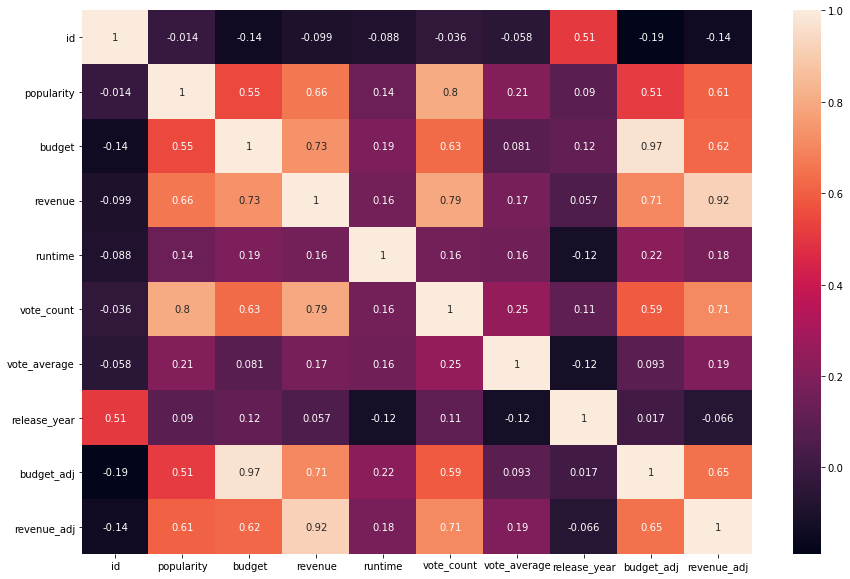

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Looking at the heat map above, there appears to be a certain degree of correlation between popularity and vote_count, and to a lesser degree, between vote_average and budget.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

>I will drop extraneous columns that aren't relevant to our analysis id,
homepage, tagline, imdb_id, overview,budget_adj, revenue_adj, keywords ,production_companies.

>Approximation of popularity number 

>Drop null values columns with a small number of nulls: cast, director, and genres.

>convert 'release_date' column into date format

>There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. 

>Convert budget and revenue column to int datatype.


In [9]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview','budget_adj', 'revenue_adj','keywords','production_companies'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [10]:
# Approximation of popularity number 
df['popularity']=df['popularity'].round(2)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


I will assess if any rows have missing values

In [11]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

I will remove rows that have no director, cast, and gender. After doing that, I'll check the dataset again to make sure there is no missing information (it should return False)

In [12]:
df.dropna(inplace=True)

In [13]:
print(df.isnull().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   budget          10731 non-null  int64  
 2   revenue         10731 non-null  int64  
 3   original_title  10731 non-null  object 
 4   cast            10731 non-null  object 
 5   director        10731 non-null  object 
 6   runtime         10731 non-null  int64  
 7   genres          10731 non-null  object 
 8   release_date    10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [15]:
# Convert column release_date to DateTime
df.release_date = pd.to_datetime(df['release_date'])
# Lets look at the new dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded.

In [16]:
columns = ['budget', 'revenue']
# Replace 0 with NAN
df[columns] = df[columns].replace(0, np.NaN)
# Drop rows which contains NAN
df.dropna(subset = columns, inplace = True)
rows, col = df.shape
print(format(rows-1))

3848


In [17]:
df.tail()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
10822,0.67,7500000.0,33736689.0,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966
10828,0.40,3000000.0,13000000.0,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966
10829,0.40,4653000.0,6000000.0,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966
10835,0.30,12000000.0,20000000.0,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966
10848,0.21,5115000.0,12000000.0,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966


Convert budget and revenue column to int datatype

In [18]:
# Convert budget and revenue column to int datatype
df['budget'] = (df['budget']).astype('int64')
df['revenue'] = (df['revenue']).astype('int64')

# Lets look at the new datatype
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

Now, we will work with the columns containing multiple values per cell, starting with the types. Will Create separate data frames for each: Genres, Cast, and Director

In [19]:
df_new_genre = df.copy()
new_genre = df_new_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
new_genre.name = 'new_split'
df_new_genre = df_new_genre.drop(['genres'], axis=1).join(new_genre)

The genres now appear to be split up and stacked, let's check to make sure that the new genre
column contains only single values.

In [20]:
df_new_genre['new_split'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

I will create a copy of the original df and apply these separately so the processing power is not slowed too much

In [21]:
df_new_genre.to_csv('tmbd-movies-genre.csv', index=False)

In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What genres are most popular?)

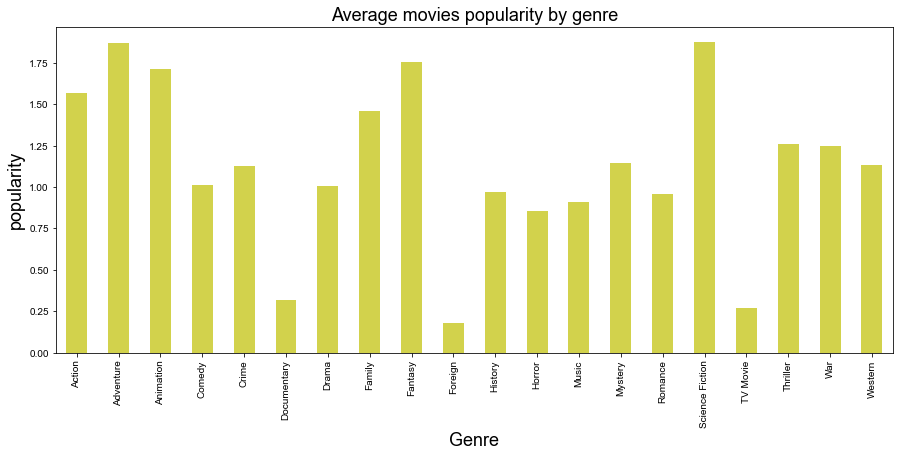

In [23]:
#grouping movies by genres on the popularity column and calculating of the mean
movies_genres=df_new_genre.groupby('new_split')['popularity'].mean()
#plotting the bar chart of movies by genre
movies_genres.plot(kind='bar',alpha=.7,figsize=(15,6), color='y');
plt.title('Average movies popularity by genre', size=18);
plt.xlabel('Genre', size=18);
plt.xticks(fontsize=10);
plt.ylabel('popularity', size=18);
#set the style sheet
sns.set_style("whitegrid")

Science Fiction, Adventure, Fantasy, and Animation are the most popular genres in general. TV Movies, Documentary, and Foreign are the least popular genres.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

scatter plots of revenue vs budget, runtime, and popularity

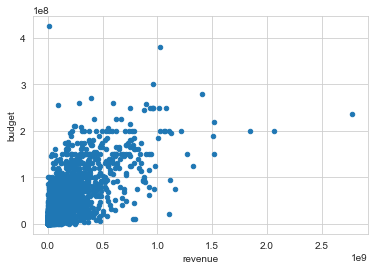

In [24]:
df.plot(x='revenue', y='budget', kind='scatter');

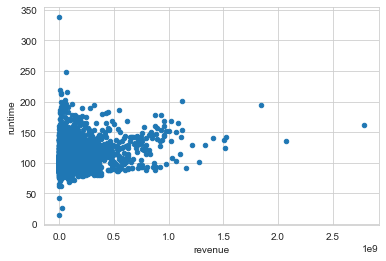

In [25]:
df.plot(x='revenue', y='runtime', kind='scatter');

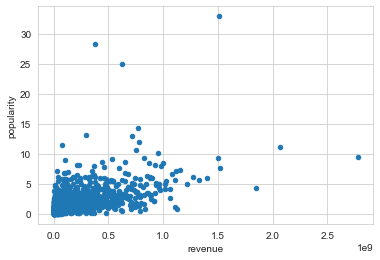

In [26]:
df.plot(x='revenue', y='popularity', kind='scatter');

>There is a weak positive correlation between revenue and budget.

>There is a strong positive relationship between revenue and runtime.

>There is a positive correlation between revenue and popularity.

### Research Question 3  (What are the 5 most popular movies?) 

In [27]:
most_popular=df[['popularity', 'original_title']].sort_values(by='popularity', ascending=False)[:5]
most_popular

,popularity,original_title
0,32.99,Jurassic World
1,28.42,Mad Max: Fury Road
629,24.95,Interstellar
630,14.31,Guardians of the Galaxy
2,13.11,Insurgent


### Research Question 4  (How have movie production trends varied over the years?)  


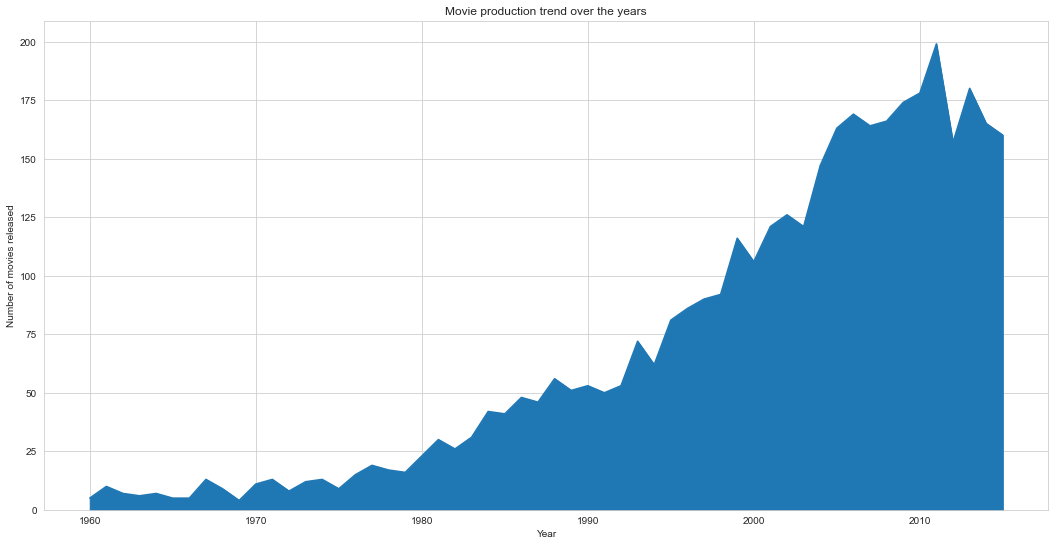

In [28]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index().plot(kind='area', figsize=(18,9));
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

As we see, movie production increase over the years 

### Research Question 5  (Which movie had the highest and lowest budget?)  


In [6]:
# Name of Movie with highest budget

df.loc[df['budget'].idxmax()]

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

In [30]:
# Name of Movie with lowest budget
df.loc[df['budget'].idxmin()]

popularity                                                     0.09
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
vote_count                                                       14
vote_average                                                    4.8
release_year                                                   1999
Name: 2618, dtype: object

Name of Movie with highest budget is The Warrior's Way with budget of 425000000 dollars

Name of Movie with lowest budget is Lost & Found with budget of 1 dollars

<a id='conclusions'></a>
## Conclusions

> The aim of the research is primarily to explore my questions:

I explored some general questions. The result showed that the trend of film popularity has been growing on average since 1960. Moreover, it focused on high-grossing films. I've found movies with higher earning levels to be popular on average in the last five years. Besides, the movies with higher earning levels haven't had a much high rating in the last five years. These results made me want to find out more: What's properties that are associated with high popularity movies? 

The number of films released is increasing year by year. It is in the direction of exponential growth.

The data does not contain any information such as movies recommended for children, so providing this data may be useful to obtain information about films, actors and genres popular with children.

There are some limitations. The above observations may not be accurate, as statistical methods are not used to infer information and only basic visualizations are used. Further analysis is required to produce accurate information. Some rows are omitted from the dataset due to lack of values, and missing values ​​are marked as "NA," which represents the missing actors, directors, genres, and production companies.

In short, I found a lot of interesting information among the dataset




In [31]:
df.to_csv('tmdb-movies_clean.csv', index=False)

In [70]:
df['popularity'] = df['popularity'].astype(int) 
df['vote_average'] = df['vote_average'].astype(int) 

In [219]:
x = df[['runtime']]
y = df[['popularity']]

In [220]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [221]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [222]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

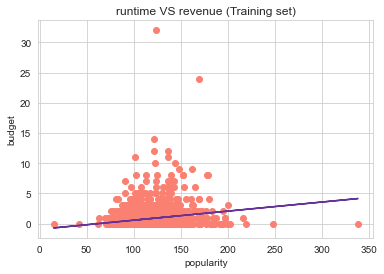

In [223]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='SALMON')
viz_train.plot(X_train, regressor.predict(X_train), color='REBECCAPURPLE')
viz_train.title('runtime VS revenue (Training set)')
viz_train.xlabel('popularity')
viz_train.ylabel('budget')
viz_train.show()

In [224]:
#Print the summary for all columns
print(df.describe())

        popularity        budget       revenue      runtime   vote_count  \
count  3849.000000  3.849000e+03  3.849000e+03  3849.000000  3849.000000   
mean      0.713172  3.724886e+07  1.078148e+08   109.217459   528.387114   
std       1.473549  4.221699e+07  1.766175e+08    19.914141   880.333629   
min       0.000000  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.000000  1.000000e+07  1.367069e+07    95.000000    71.000000   
50%       0.000000  2.400000e+07  4.490726e+07   106.000000   205.000000   
75%       1.000000  5.000000e+07  1.243052e+08   119.000000   581.000000   
max      32.000000  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year  
count   3849.000000   3849.000000  
mean       5.718109   2001.258249  
std        0.847086     11.285642  
min        2.000000   1960.000000  
25%        5.000000   1995.000000  
50%        6.000000   2004.000000  
75%        6.000000   2010.000000  
max        8.000000   2015.

In [225]:
print(regressor.intercept_)

[-0.94851648]


In [226]:
y_pred = regressor.predict(X_test)

y_pred

array([[0.78276303],
       [0.64727159],
       [1.27956497],
       ...,
       [0.64727159],
       [0.64727159],
       [1.3849472 ]])

In [227]:
regressor.coef_

array([[0.0150546]])

In [228]:
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics

In [229]:
 mean_squared_error(X_test,y_pred) 

12230.067286626523

In [230]:
r2_score(X_test,y_pred) #Variance score

-31.749782214123385

In [214]:
print(regressor.score(X_test,y_pred))

1.0


In [215]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.4318368597443989


In [216]:
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 0.8322431781817221


In [217]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.9122736311993908


In [218]:
 print('R square:',metrics.r2_score(y_test, y_pred))

R square: 0.6172410489766321
